<a href="https://colab.research.google.com/github/MasumUddin/HTML-CSS-DESIGN/blob/master/COVID_PREDICTION_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Covid 19 death rate & Infection Rate prediction based on HMM**


Importing pandas,numpy,seaborn and matplotlib libraries

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import the dataset from https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university/discussion/215068

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/710_final_project/RAW_us_confirmed_cases.csv")
dataset.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10477,10495,10508,10512,10512,10517,10517,10517,10526,10527,10531,10545,10560,10561,10562,10566,10575,10584,10589,10596,10599,10605,10637,10641,10646,10661,10663,10669,10679,10692,10711,10746,10758,10785,10789,10800,10828,10886,10953,11018
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38000,38014,38042,38061,38061,38068,38074,38085,38104,38123,38140,38171,38195,38207,38215,38236,38247,38265,38278,38307,38314,38321,38398,38413,38441,38457,38484,38506,38521,38569,38628,38690,38771,38864,38878,38942,39084,39298,39583,39911
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3688,3690,3691,3691,3691,3694,3694,3695,3699,3700,3700,3701,3706,3708,3708,3708,3712,3714,3714,3716,3716,3716,3718,3719,3720,3722,3722,3723,3725,3725,3726,3730,3735,3740,3742,3742,3750,3777,3819,3860
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4337,4338,4339,4340,4340,4340,4340,4340,4345,4348,4352,4354,4357,4362,4364,4367,4371,4375,4378,4379,4379,4379,4385,4388,4391,4393,4396,4397,4400,4406,4409,4410,4410,4414,4420,4426,4452,4472,4514,4533
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10640,10659,10696,10700,10700,10714,10715,10717,10729,10739,10756,10765,10779,10782,10791,10803,10817,10828,10840,10857,10860,10864,10878,10904,10919,10941,10954,10959,10969,10990,11002,11031,11041,11053,11064,11072,11096,11128,11193,11256


Removing unnecessary columns from the dataset

In [ ]:
updated_dataset= dataset.drop(["UID","iso2","iso3","code3","FIPS","Admin2","Lat","Long_"],axis=1)
updated_dataset.head()

,Province_State,Country_Region,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21
0,Alabama,US,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10477,10495,10508,10512,10512,10517,10517,10517,10526,10527,10531,10545,10560,10561,10562,10566,10575,10584,10589,10596,10599,10605,10637,10641,10646,10661,10663,10669,10679,10692,10711,10746,10758,10785,10789,10800,10828,10886,10953,11018
1,Alabama,US,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38000,38014,38042,38061,38061,38068,38074,38085,38104,38123,38140,38171,38195,38207,38215,38236,38247,38265,38278,38307,38314,38321,38398,38413,38441,38457,38484,38506,38521,38569,38628,38690,38771,38864,38878,38942,39084,39298,39583,39911
2,Alabama,US,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3688,3690,3691,3691,3691,3694,3694,3695,3699,3700,3700,3701,3706,3708,3708,3708,3712,3714,3714,3716,3716,3716,3718,3719,3720,3722,3722,3723,3725,3725,3726,3730,3735,3740,3742,3742,3750,3777,3819,3860
3,Alabama,US,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4337,4338,4339,4340,4340,4340,4340,4340,4345,4348,4352,4354,4357,4362,4364,4367,4371,4375,4378,4379,4379,4379,4385,4388,4391,4393,4396,4397,4400,4406,4409,4410,4410,4414,4420,4426,4452,4472,4514,4533
4,Alabama,US,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10640,10659,10696,10700,10700,10714,10715,10717,10729,10739,10756,10765,10779,10782,10791,10803,10817,10828,10840,10857,10860,10864,10878,10904,10919,10941,10954,10959,10969,10990,11002,11031,11041,11053,11064,11072,11096,11128,11193,11256


Group dataset based on combined_key which consists of province,state,country

In [ ]:
aggregated_data= updated_dataset.groupby("Combined_Key").sum()
aggregated_data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21
Combined_Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Abbeville, South Carolina, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3922,3926,3929,3928,3939,3939,3939,3958,3959,3964,3972,3977,3977,3977,3998,4000,4013,4024,4032,4032,4032,4070,4074,4083,4090,4104,4104,4104,4128,4137,4147,4157,4157,4157,4157,4157,4157,4207,4234,4282
"Acadia, Louisiana, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10606,10614,10623,10623,10623,10623,10623,10650,10663,10673,10687,10690,10690,10690,10697,10704,10713,10719,10726,10726,10726,10733,10733,10745,10750,10754,10754,10754,10776,10785,10801,10817,10817,10817,10817,10926,10950,11036,11132,11132
"Accomack, Virginia, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4186,4193,4199,4203,4206,4206,4206,4210,4219,4222,4228,4228,4228,4228,4249,4260,4267,4275,4285,4285,4285,4303,4311,4312,4325,4333,4333,4333,4359,4365,4372,4377,4390,4390,4390,4428,4446,4463,4507,4545
"Ada, Idaho, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,84621,84756,84903,84903,85044,85156,85156,85261,85403,85590,85741,85859,85933,85933,86072,86226,86443,86582,86663,86714,86714,86911,86997,87113,87200,87341,87381,87381,87535,87672,87750,87867,87867,87867,87867,88304,88698,88905,89225,89225
"Adair, Iowa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1110,1110,1143,1143,1143,1143,1143,1143,1143,1182,1182,1182,1182,1182,1182,1182,1215,1215,1230,1230,1230,1230,1230,1260,1260,1260,1260,1260,1260,1260,1302,1302,1302,1302,1302,1302,1302,1323,1323,1323


Visualizing a graph where x-axis is Date and y-axis is Covid cases

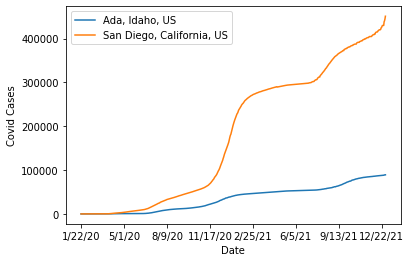

In [ ]:
aggregated_data.loc["Ada, Idaho, US"].plot()
aggregated_data.loc["San Diego, California, US"].plot()
plt.xlabel('Date')
plt.ylabel('Covid Cases')
plt.legend()

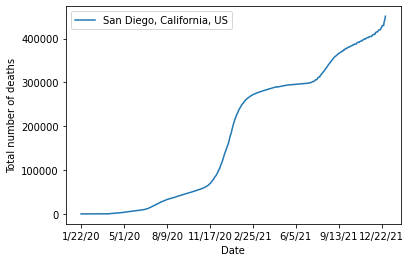

In [ ]:
aggregated_data.loc["San Diego, California, US"].plot()
plt.xlabel('Date')
plt.ylabel('Total number of deaths')
plt.legend()

Calculating and plotting first derivative of curve

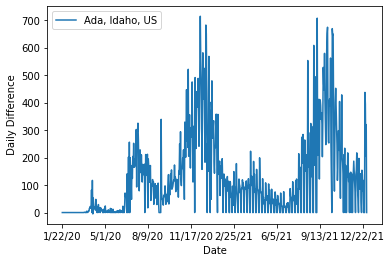

In [ ]:
aggregated_data.loc["Ada, Idaho, US"].diff().plot()
plt.xlabel('Date')
plt.ylabel(' Daily Difference')
plt.legend()

First derivatives of all cities, i.e: max infection rate of all cities

In [ ]:
places= list(aggregated_data.index)
max_infection_rates =[]
for p in places :
    max_infection_rates.append(aggregated_data.loc[p].diff().max())

aggregated_data["max_infection_rate"]=max_infection_rates
covid_data= pd.DataFrame(aggregated_data["max_infection_rate"])
covid_data.head()

,max_infection_rate
Combined_Key,
"Abbeville, South Carolina, US",137.0
"Acadia, Louisiana, US",217.0
"Accomack, Virginia, US",77.0
"Ada, Idaho, US",714.0
"Adair, Iowa, US",42.0


Importing number of deaths per day in USA

In [ ]:
covid_death_dataset=pd.read_csv("/content/drive/MyDrive/710_final_project/RAW_us_deaths.csv")
covid_death_dataset.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,156,156,156,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,158,158,158,158,158,158,158,159,159,159,159,160,160,160,160,160,160,160,160,160,160,160
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,588,588,589,589,589,589,589,589,589,589,589,589,589,589,589,590,590,590,590,591,591,591,591,591,592,592,592,592,592,592,593,593,593,593,593,593,593,593,593,593
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93,94,94,94,94,94,94,94,94,94,94,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,190,191,192,192,192,192,192,192,192,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,194,194,195,195,195,197,197,197,197,197,197,197,197,198,198,198


Removing unnecessary columns from the dataset

In [ ]:
updated_covid_death_dataset= covid_death_dataset.drop(["UID","iso2","iso3","code3","FIPS","Admin2","Lat","Long_"],axis=1)
updated_covid_death_dataset.head()

,Province_State,Country_Region,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21
0,Alabama,US,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,156,156,156,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,158,158,158,158,158,158,158,159,159,159,159,160,160,160,160,160,160,160,160,160,160,160
1,Alabama,US,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,588,588,589,589,589,589,589,589,589,589,589,589,589,589,589,590,590,590,590,591,591,591,591,591,592,592,592,592,592,592,593,593,593,593,593,593,593,593,593,593
2,Alabama,US,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81
3,Alabama,US,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93,94,94,94,94,94,94,94,94,94,94,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
4,Alabama,US,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,190,191,192,192,192,192,192,192,192,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,194,194,195,195,195,197,197,197,197,197,197,197,197,198,198,198


Group dataset based on combined_key which consists of province,state,country

In [ ]:
aggregated_death_data= updated_covid_death_dataset.groupby("Combined_Key").sum()
aggregated_death_data.head()

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21
Combined_Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Abbeville, South Carolina, US",24527,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,50,50,50,50,50,50,50,50,50,50,51,51,51,51,52,52,52,52,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,54,54,54
"Acadia, Louisiana, US",62045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,253,254,254,254,254,254,254,255,255,255,255,255,255,255,256,256,256
"Accomack, Virginia, US",32316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,80,80,80,80,80,80,80,80,80,81,81,81,81,81,81,81,81,81,81,81,81,82,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
"Ada, Idaho, US",481587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,822,825,826,826,826,833,833,833,835,838,838,839,840,840,840,844,844,845,847,847,847,847,849,850,851,854,854,854,854,855,859,859,859,859,859,861,863,865,865,865
"Adair, Iowa, US",7152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37,37,37,37,37,37,37,37,37,39,39,39,39,39,39,39,39,39,41,41,41,41,41,43,43,43,43,43,43,43,43,43,43,43,43,43,43,44,44,44


Death rates of all the cities

In [ ]:
places= list(aggregated_death_data.index)
max_death_rates =[]
for p in places :
    max_death_rates.append(aggregated_death_data.loc[p].diff().max())

aggregated_death_data["max_death_rate"]=max_death_rates
covid_death_data= pd.DataFrame(aggregated_death_data["max_death_rate"])
covid_death_data.head(n=20)

,max_death_rate
Combined_Key,
"Abbeville, South Carolina, US",3.0
"Acadia, Louisiana, US",7.0
"Accomack, Virginia, US",3.0
"Ada, Idaho, US",21.0
"Adair, Iowa, US",5.0
"Adair, Kentucky, US",7.0
"Adair, Missouri, US",7.0
"Adair, Oklahoma, US",12.0
"Adams, Colorado, US",23.0


Joining the both infection and death data

In [ ]:
joined_data=covid_data.join(covid_death_data)
joined_data.head()

,max_infection_rate,max_death_rate
Combined_Key,,
"Abbeville, South Carolina, US",137.0,3.0
"Acadia, Louisiana, US",217.0,7.0
"Accomack, Virginia, US",77.0,3.0
"Ada, Idaho, US",714.0,21.0
"Adair, Iowa, US",42.0,5.0


Co-relation matrix between maximum infection rate and maximum death rate

In [ ]:
joined_data.corr()

,max_infection_rate,max_death_rate
max_infection_rate,1.00000,0.45022
max_death_rate,0.45022,1.00000


Plotting scatterplot between maximum infection rate and maximum death rate

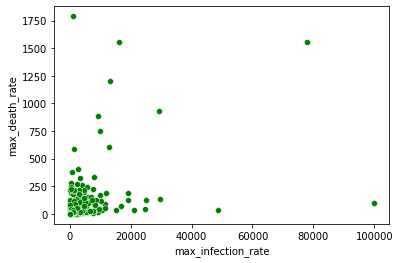

In [ ]:
x=joined_data["max_infection_rate"]
y=joined_data["max_death_rate"]
sns.scatterplot(x=x,y=y,color="g")

Plotting regplot graph between maximum infection rate and maximum death rate

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


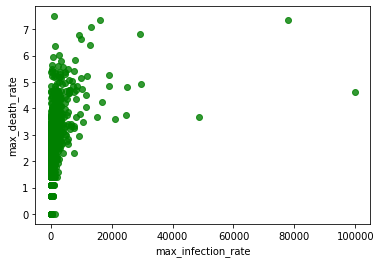

In [ ]:
sns.regplot(x=x,y=np.log(y),color="g")

Importing hidden markov model library

In [ ]:
!pip install hmmlearn

In [ ]:
ir=np.array(joined_data["max_infection_rate"])
dr= np.array(joined_data["max_death_rate"])
features=np.column_stack((ir,dr))

In [ ]:
from hmmlearn import hmm
score_list=[]
finhmm=hmm.GaussianHMM(n_components=3)
finhmm.fit(features)

GaussianHMM(n_components=3)

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(joined_data, test_size=.33,shuffle=False)
ir_train=np.array(train["max_infection_rate"])
dr_train=np.array(train["max_death_rate"])
train_features=np.column_stack((ir_train,dr_train))
ir_test=np.array(test["max_infection_rate"])
dr_train=np.array(test["max_death_rate"])
test_features=np.column_stack((ir_test,dr_train))
test_features

array([[ 64.,   5.],
       [671.,  18.],
       [ 16.,   1.],
       ...,
       [ 72.,   3.],
       [ 98.,   3.],
       [ 27.,   1.]])

In [ ]:
from hmmlearn import hmm
hm=hmm.GaussianHMM(n_components=4)
hm.fit(train_features)


GaussianHMM(n_components=4)

In [ ]:

n_latency_days=5
day_index=50
previous_data_start_index=max(0,day_index-n_latency_days)
previous_data_end_index=max(0,day_index-1)
previous_data =test.iloc[previous_data_start_index:previous_data_end_index]
ir_prv=np.array(previous_data["max_infection_rate"])
dr_prv=np.array(previous_data["max_death_rate"])
prv50_features=np.column_stack((ir_prv,dr_prv))

In [ ]:
day_index=100
previous_data_start_index=max(0,day_index-n_latency_days)
previous_data_end_index=max(0,day_index-1)
previous_data =test.iloc[previous_data_start_index:previous_data_end_index]
ir_prv=np.array(previous_data["max_infection_rate"])
dr_prv=np.array(previous_data["max_death_rate"])
prv100_features=np.column_stack((ir_prv,dr_prv))

In [ ]:
day_index=200
previous_data_start_index=max(0,day_index-n_latency_days)
previous_data_end_index=max(0,day_index-1)
previous_data =test.iloc[previous_data_start_index:previous_data_end_index]
ir_prv=np.array(previous_data["max_infection_rate"])
dr_prv=np.array(previous_data["max_death_rate"])
prv200_features=np.column_stack((ir_prv,dr_prv))

In [ ]:
day_index=365
previous_data_start_index=max(0,day_index-n_latency_days)
previous_data_end_index=max(0,day_index-1)
previous_data =test.iloc[previous_data_start_index:previous_data_end_index]
ir_prv=np.array(previous_data["max_infection_rate"])
dr_prv=np.array(previous_data["max_death_rate"])
prv365_features=np.column_stack((ir_prv,dr_prv))

In [ ]:
day_index=710
previous_data_start_index=max(0,day_index-n_latency_days)
previous_data_end_index=max(0,day_index-1)
previous_data =test.iloc[previous_data_start_index:previous_data_end_index]
ir_prv=np.array(previous_data["max_infection_rate"])
dr_prv=np.array(previous_data["max_death_rate"])
prv710_features=np.column_stack((ir_prv,dr_prv))

In [ ]:
outcome_50f=hm.score(prv50_features)
predict_50f=hm.predict_proba(prv50_features)

outcome_100f=hm.score(prv100_features)
predict_100f=hm.predict_proba(prv100_features)

outcome_200f=hm.score(prv200_features)
predict_200f=hm.predict_proba(prv200_features)

outcome_710f=hm.score(prv710_features)
predict_710f=hm.predict_proba(prv710_features)

outcome_365f=hm.score(prv365_features)
predict_365f=hm.predict_proba(prv365_features)

In [ ]:
data ={"First 50 Days":[outcome_50f],
       "First 100 Days":[outcome_100f],
       "First 200 Days":[outcome_200f],
       "First 365 Days":[outcome_365f],
       "First 710 Days":[outcome_710f]
      }
df_final = pd.DataFrame(data,columns=["First 50 Days","First 100 Days","First 200 Days","First 365 Days","First 710 Days"])

The log-likelyhood of the values are shown below. 

In [ ]:
df_final

,First 50 Days,First 100 Days,First 200 Days,First 365 Days,First 710 Days
0,-42.266848,-39.915812,-37.513524,-37.210658,-42.206652
